Μπεκιάρης Χαράλαμπος

Σχολή ΕΜΦΕ

Α.Μ.: ge18088

# Παραδοτέο 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 10)  # increase default figure size

np.random.seed(2016)  # for reproducibility

##########################################3

def Ising(spins_init, Temp, nsteps=None):
    """
    Ising Model.
        spins_init: initial configuration
        Temp: the Temperature
        updates: the number of updates to perform
    """
    spins = spins_init.astype(np.int8)  # copy and save some space :)
    L = spins.shape[0]
    N = L * L
    kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=np.int8)
    Temp = Temp
    if nsteps is None:
        nsteps = L * L * 800  # number of updates

    for n in range(nsteps):
        r, c = np.random.randint(0, L, 2)  # select a vertex at random
        C = [(c-1) % L, c % L, (c + 1) % L]
        R = [[(r-1) % L], [r % L], [(r+1) % L]]
        DH = -spins[r, c] * np.sum(kernel * spins[R, C]) / Temp
        if np.log(np.random.rand()) < DH:
            spins[r, c] *= -1  # switch sign
    
    return spins

## Ζήτημα α.

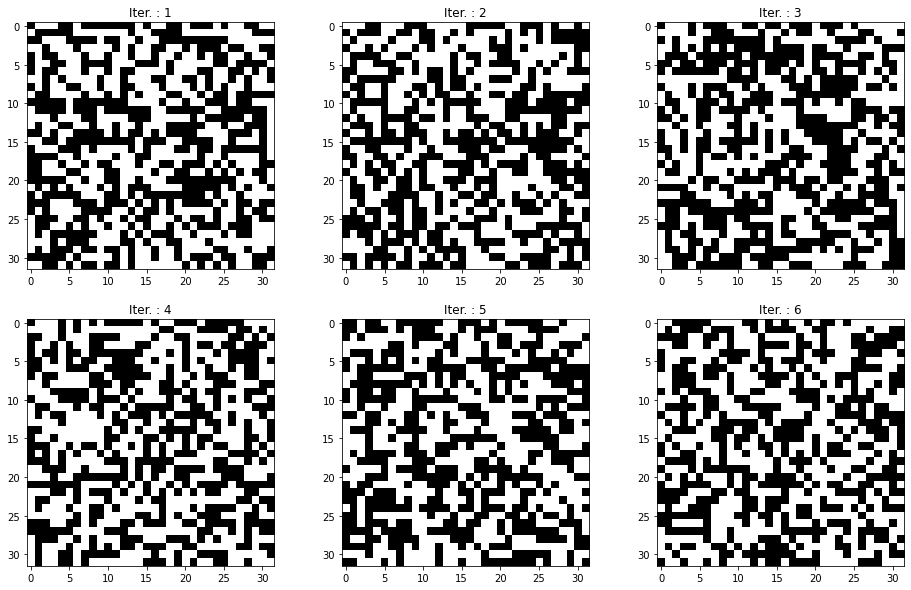

In [21]:
L = 32  # length of lattice
Temperature = 30.  # in units where the Boltzmann factor is 1
spins = np.ones((L,L),dtype=np.int8)  # table with initialized spin value=+1 for all particles
#####################################
for i in range(6):
    res = Ising(spins,Temperature)
    ####
    ax = plt.subplot(2, 3, i+1)
    plt.imshow(res, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Iter. : {}".format(i+1))
#####################################

plt.show()

Παρατηρούμε ότι δεν αλλάζουν τα ποιοτικά χαρακτηριστικά, εξακολουθούν τα "μαύρα τετράγωνα" να είναι απλωμένα στο πλέγμα, αν και υπάρχουν ορισμένα σημεία όπου είναι συγκεντρωμένα, όπως φαίνεται στο $Iter. 3$.

## Ζήτημα β.

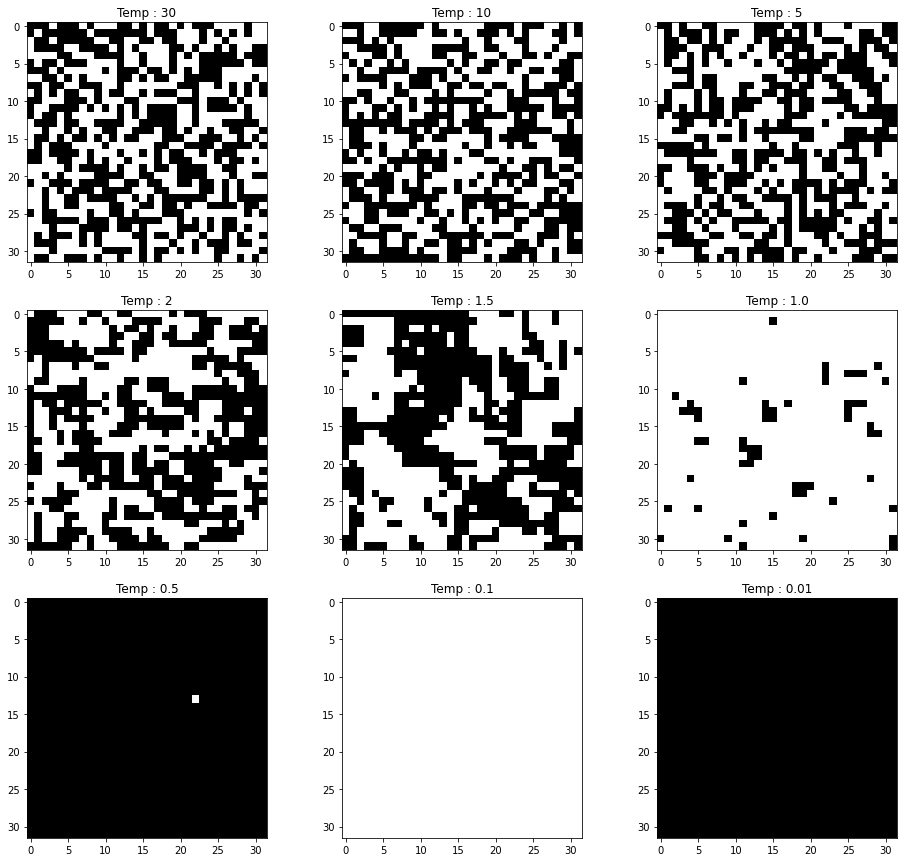

In [5]:
plt.rcParams["figure.figsize"] = (16, 15)

T = [30, 10, 5, 2, 1.5, 1., 0.5, 0.1, 0.01]
spins = 2 * (np.random.rand(L, L) > 0.5) - 1
j = 1
##############
for temp in T:
    res = Ising(spins,temp)
    ###
    ax = plt.subplot(3, 3, j)
    plt.imshow(res, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Temp : {}".format(temp))
    ###
    j+=1

Πράγματι, βλέπουμε ότι ο αλγόριθμος σε μεγάλες θερμοκρασίες δέχεται τις προτεινόμενες αλλαγές στο spin. Καθώς ελαττώνεται η θερμοκρασία, όλο και περισσότερα ηλεκτρόνια έχουν το ίδιο spin.


## Ζήτημα γ.


In [32]:
m = []
##############
for temp in T:
    res = Ising(spins,temp)
    m.append(res.mean()) # Use numpy's built-in method for ndarrays to calculate mean

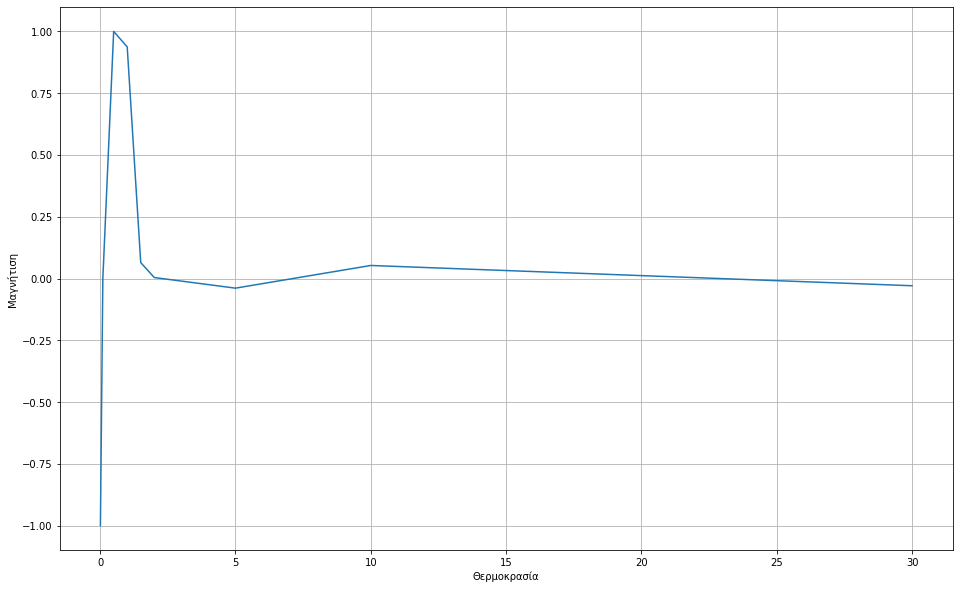

In [33]:
plt.plot(T, m)
plt.xlabel("Θερμοκρασία")
plt.ylabel("Μαγνήτιση")
plt.grid(True)

plt.show()

## Ζήτημα δ.

Για να δούμε τα ζητούμενα στυγμιότυπα μέχρι η αλυσίδα να έχει συμπληρώσει $800×L×L$ βήματα, θα πρέπει αρχικά να τρέξουμε την αλυσίδα για $10×L×L$. Στην συνέχεια για να δούμε τα $20×L×L$ βήματα θα πρέπει η αλυσίδα μας να προχωρήσει άλλα $10×L×L$, κ.ο.κ.

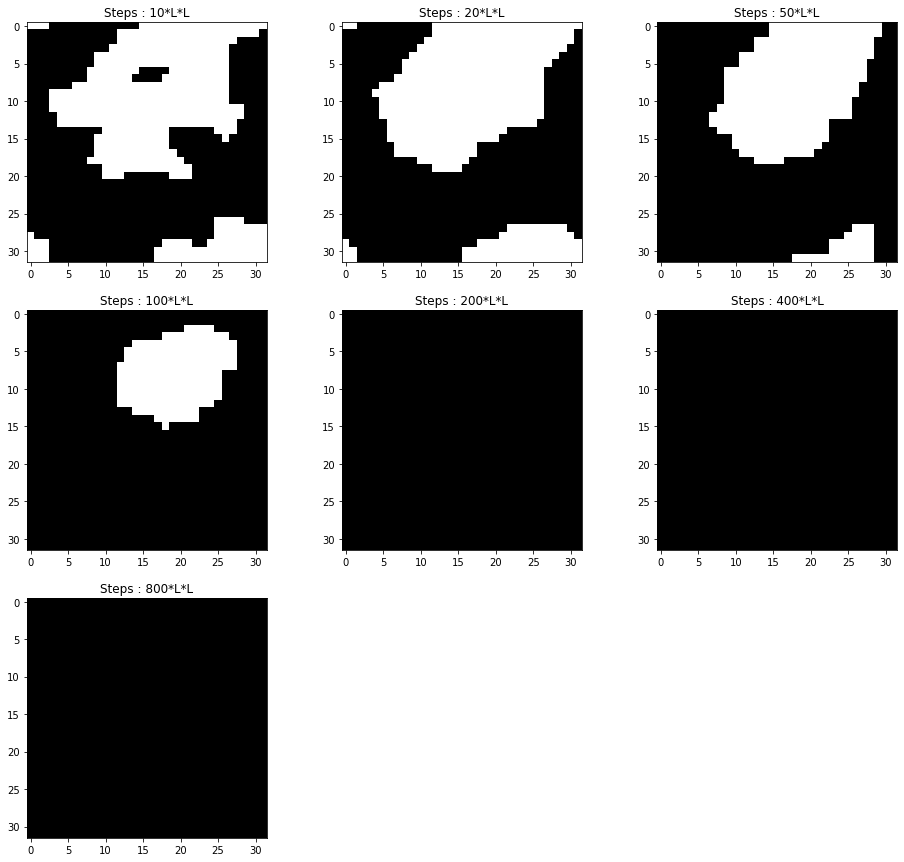

In [15]:
real  = [10,20,50,100,200,400,800]
steps = [10,10,30,50,100,200,400]
T = 0.1
spins = 2 * (np.random.rand(L, L) > 0.5) - 1
for j in range(len(steps)):
    spins = Ising(spins,T,steps[j]*L*L)
    ###
    ax = plt.subplot(3, 3, j+1)
    plt.imshow(spins, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
    plt.title("Steps : {}*L*L".format(real[j]))
    ###

Απο τα παραπάνω στυγμιότυπα βλέπουμε την εικόνα να "μετακινείται" ώστε να ενoποιηθούν τα blocks με το ίδιο spin. 